In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import randint, uniform
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


In [69]:
data = pd.read_csv('data.csv')
data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [70]:
# 检查缺失值
print(data.isnull().sum())

# 处理缺失值（删除有缺失值的行，或者使用插值等方式填补）
data = data.dropna()

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64


In [96]:
# 删除无关列（id 和 species）
X = data.drop(['id', 'species'], axis=1)
y = data['species']

# 4. 目标变量编码
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 查看编码后的标签
print("\n原始标签示例：", y[:5].values)
print("编码后的标签示例：", y_encoded[:5])

# 5. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# 6. 数据重采样
smote = SMOTE(random_state=42,k_neighbors=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


原始标签示例： ['Acer_Opalus' 'Pterocarya_Stenoptera' 'Quercus_Hartwissiana'
 'Tilia_Tomentosa' 'Quercus_Variabilis']
编码后的标签示例： [ 3 49 65 94 84]


In [93]:
data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [103]:
# 转换为 DMatrix 格式（XGBoost 专用数据格式）
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 定义参数
params = {
    'objective': 'multi:softmax',
    'num_class': len(np.unique(y_encoded)),
    'max_depth': 5, 
    'eta': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'mlogloss',
    'seed': 42,
    'lambda': 10.0,  
    'alpha': 5.0  
}

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,  # 增加迭代次数
    evals=[(dtrain, 'train'), (dtest, 'eval')],
    early_stopping_rounds=200,  # 增加早停法的轮次
    verbose_eval=False
)
# 预测
y_pred = bst.predict(dtest)

# 10. 模型评估
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\n模型评估结果：")
print(f"准确率 (Accuracy): {accuracy:.4f}")
print(f"精确率 (Precision): {precision:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"F1 分数 (F1 Score): {f1:.4f}")

# 11. 检查过拟合
y_train_pred = bst.predict(dtrain)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\n训练集准确率: {train_accuracy:.4f}")
print(f"测试集准确率: {accuracy:.4f}")


模型评估结果：
准确率 (Accuracy): 0.8182
精确率 (Precision): 0.8458
召回率 (Recall): 0.8182
F1 分数 (F1 Score): 0.8064

训练集准确率: 1.0000
测试集准确率: 0.8182


c:\Python3.11.4\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


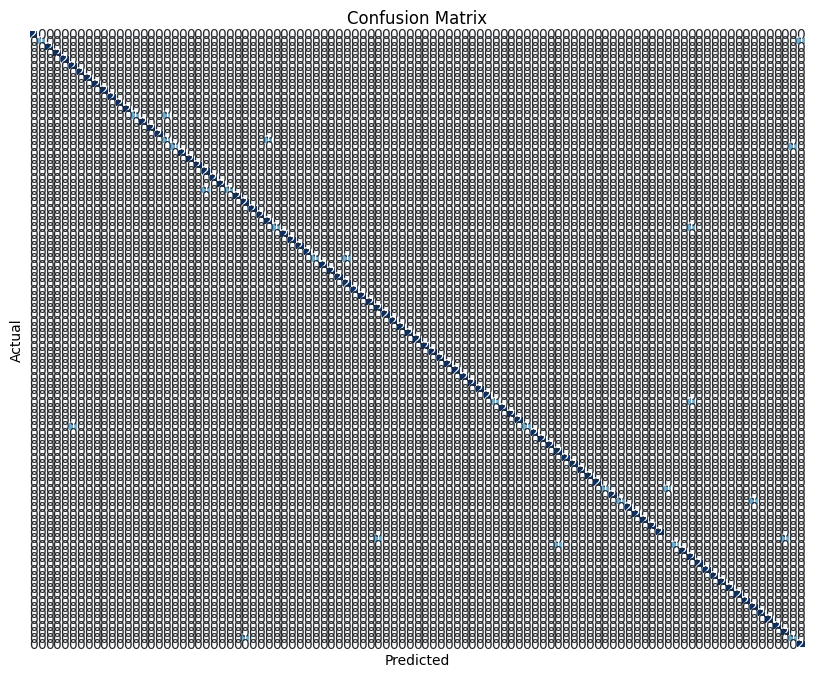

In [76]:
# 7. 混淆矩阵可视化
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))  # 调整图像尺寸
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=False, yticklabels=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

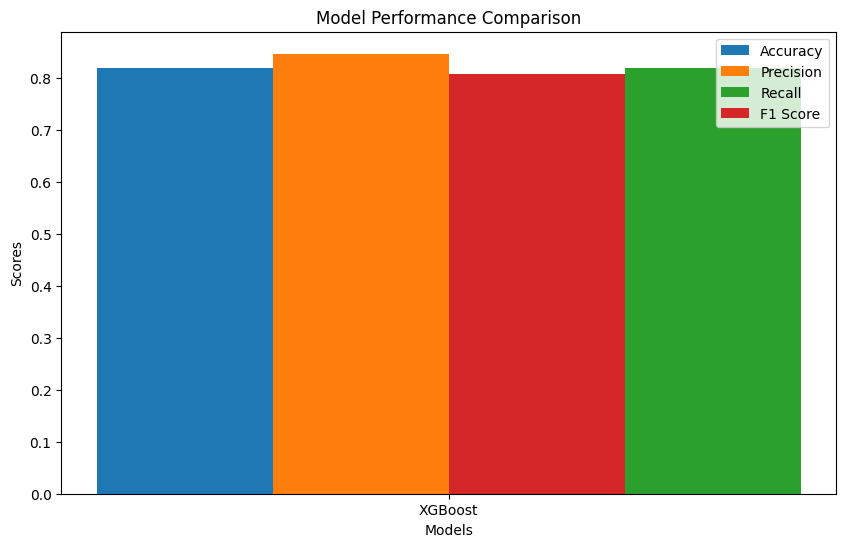

In [106]:
# 可视化不同模型的评价指标
models = ['XGBoost']
accuracy_scores = [accuracy]
precision_scores = [precision]
recall_scores = [recall]
f1_scores = [f1]

# 绘制柱状图
x = np.arange(len(models)) # X轴位置

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.2 # 每个柱状图的宽度

ax.bar(x - width*1.5, accuracy_scores, width, label='Accuracy')
ax.bar(x - width/2, precision_scores, width, label='Precision')
ax.bar(x + width*1.5, recall_scores, width, label='Recall')
ax.bar(x + width/2, f1_scores, width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()


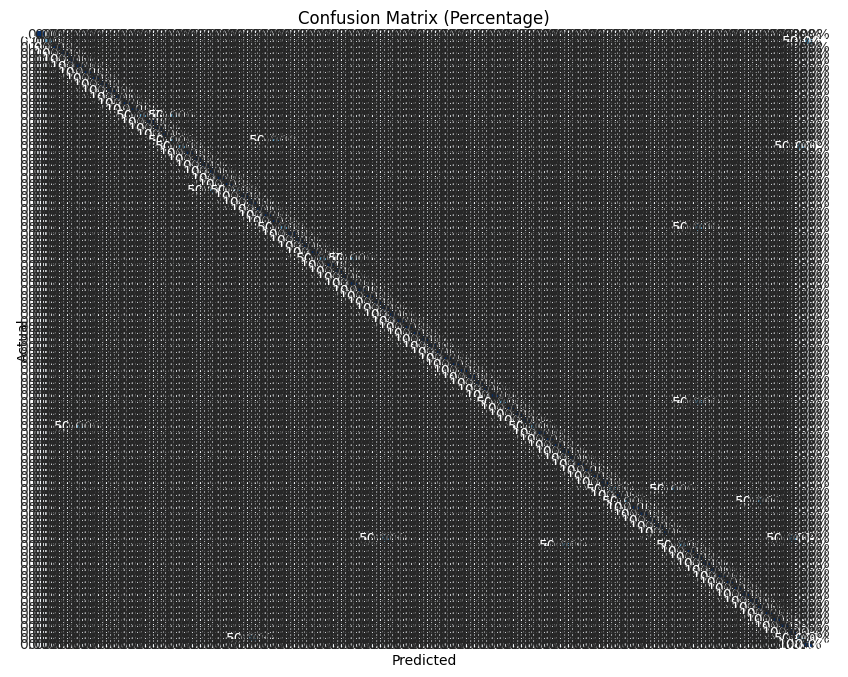

In [105]:
#百分比混淆矩阵
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False, xticklabels=False, yticklabels=False)
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()